In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime, date, time


In [ ]:
df= pd.read_csv('/content/drive/My Drive/YouTube Trending Video Statistics./DEvideos.csv')
categories_df = pd.read_json('/content/drive/My Drive/YouTube Trending Video Statistics./DE_category_id.json')

In [ ]:
df['category_id'] =df['category_id'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40840 entries, 0 to 40839
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40840 non-null  object
 1   trending_date           40840 non-null  object
 2   title                   40840 non-null  object
 3   channel_title           40840 non-null  object
 4   category_id             40840 non-null  object
 5   publish_time            40840 non-null  object
 6   tags                    40840 non-null  object
 7   views                   40840 non-null  int64 
 8   likes                   40840 non-null  int64 
 9   dislikes                40840 non-null  int64 
 10  comment_count           40840 non-null  int64 
 11  thumbnail_link          40840 non-null  object
 12  comments_disabled       40840 non-null  bool  
 13  ratings_disabled        40840 non-null  bool  
 14  video_error_or_removed  40840 non-null  bool  
 15  de

In [ ]:
id_to_category = {}
for category in categories_df['items']:
  id_to_category[category['id']] = category['snippet']['title']

df.insert(4,'category',df['category_id'].map(id_to_category))

In [ ]:
df.head().T

,0,1,2,3,4
video_id,LgVi6y5QIjM,Bayt7uQith4,1ZAPwfrtAFY,AHtypnRk7JE,ZJ9We4bjcg0
trending_date,17.14.11,17.14.11,17.14.11,17.14.11,17.14.11
title,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,The Trump Presidency: Last Week Tonight with J...,Das Fermi-Paradoxon,18 SONGS mit Kelly MissesVlog (Sing-off)
channel_title,inscope21,LUKE! Die Woche und ich,LastWeekTonight,100SekundenPhysik,rezo
category,Entertainment,Comedy,Entertainment,Education,Entertainment
category_id,24,23,24,27,24
publish_time,2017-11-13T17:08:49.000Z,2017-11-12T22:30:01.000Z,2017-11-13T07:30:00.000Z,2017-11-12T15:00:01.000Z,2017-11-12T13:10:36.000Z
tags,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...","Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...","last week tonight trump presidency|""last week ...","Physik|""Wissenschaft""|""Technik""|""Science-Ficti...","kelly|""missesvlog""|""kelly song""|""bausa""|""bausa..."
views,252786,797196,2418783,380247,822213
likes,35885,53576,97190,31821,100684


View the description of the data below, including the type of each attribute:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40840 entries, 0 to 40839
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40840 non-null  object
 1   trending_date           40840 non-null  object
 2   title                   40840 non-null  object
 3   channel_title           40840 non-null  object
 4   category                40584 non-null  object
 5   category_id             40840 non-null  object
 6   publish_time            40840 non-null  object
 7   tags                    40840 non-null  object
 8   views                   40840 non-null  int64 
 9   likes                   40840 non-null  int64 
 10  dislikes                40840 non-null  int64 
 11  comment_count           40840 non-null  int64 
 12  thumbnail_link          40840 non-null  object
 13  comments_disabled       40840 non-null  bool  
 14  ratings_disabled        40840 non-null  bool  
 15  vi

**describe** method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

In [ ]:
df.describe()

,views,likes,dislikes,comment_count
count,4.084000e+04,4.084000e+04,4.084000e+04,4.084000e+04
mean,6.034553e+05,2.187550e+04,1.397136e+03,2.785857e+03
std,2.348963e+06,1.018000e+05,1.457738e+04,1.745803e+04
min,5.180000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.706875e+04,5.330000e+02,2.900000e+01,7.900000e+01
50%,1.192770e+05,2.699000e+03,1.340000e+02,3.760000e+02
75%,4.431015e+05,1.179625e+04,5.320000e+02,1.376000e+03
max,1.138762e+08,4.924056e+06,1.470386e+06,1.084435e+06


In [ ]:
df.describe(include="O").T

,count,unique,top,freq
video_id,40840,29627,pk0iqFne5eU,7
trending_date,40840,205,18.19.02,200
title,40840,29682,Nur 2% aller Menschen schaffen diese 5 Rätsel..,20
channel_title,40840,6085,Galileo,200
category,40584,17,Entertainment,15292
category_id,40840,18,24,15292
publish_time,40840,28261,2017-12-15T05:00:00.000Z,10
tags,40840,23557,[none],3031
thumbnail_link,40840,29626,https://i.ytimg.com/vi/pk0iqFne5eU/default.jpg,7
description,39288,25617,Новости БЕЗ нашего мнения - http://sharij.net/...,116


In [ ]:
print ("\n\nRows     : " ,df.shape[0])
print ("\nColumns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())



Rows     :  40840

Columns  :  17

Features : 
 ['video_id', 'trending_date', 'title', 'channel_title', 'category', 'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description']

Missing values :   1808

Unique values :  
 video_id                  29627
trending_date               205
title                     29682
channel_title              6085
category                     17
category_id                  18
publish_time              28261
tags                      23557
views                     37916
likes                     17793
dislikes                   5108
comment_count              7579
thumbnail_link            29626
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description               25617
dtype: int64


In [ ]:
df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category                   256
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1552
dtype: int64

So we have:

40840 rows and 16 columns

Publish Time column with data type : Object

Missing values in the description column

205 unique days

In [ ]:
df= df.drop_duplicates(keep = 'first')
df.shape

(40840, 17)

In [ ]:
df["trending_date"]=df["trending_date"].map( lambda x: datetime.strptime(str(x),"%y.%d.%m"))
df['publish_time'] =df['publish_time'].map(lambda x: datetime.strptime(str(x),'%Y-%m-%dT%H:%M:%S.%fZ'))

In [ ]:
df['publish_hour']=df['publish_time'].map(lambda x:  x.hour)
df['publish_date']=df['publish_time'].map(lambda x:  x.date())

In [ ]:
df['publish_date']

0        2017-11-13
1        2017-11-12
2        2017-11-13
3        2017-11-12
4        2017-11-12
            ...    
40835    2018-06-12
40836    2018-06-13
40837    2018-06-12
40838    2018-06-11
40839    2018-06-13
Name: publish_date, Length: 40840, dtype: object

In [ ]:
df = df.drop(['publish_time',"ratings_disabled",'comments_disabled','video_error_or_removed'], axis=1)

In [ ]:
df1=df.groupby('category_id').agg({'likes':["mean"],'dislikes':["mean"],'views':["mean"],'comment_count':["mean"]})
df2=df1.sort_values(('views','mean'),ascending=False)
df2=df2.iloc[:10,:]
df2.style.background_gradient(cmap='Pastel2')

,likes,dislikes,views,comment_count
,mean,mean,mean,mean
category_id,,,,
10,126600.786678,5474.362563,2396235.516863,12488.126476
30,31917.000000,1297.000000,1535502.000000,1624.500000
1,19072.199495,784.880471,739555.696970,2267.386785
28,19073.037221,914.596774,710249.569479,4271.573201
17,13679.659520,782.614462,704284.984738,1533.570131
23,29513.577348,1009.416338,648049.784530,3493.279006
29,57034.972656,15650.359375,621727.062500,15159.066406
24,17509.303688,1470.411588,529861.280016,2386.033024


In [ ]:

toptrend=df.groupby('category')['category_id','views', 'likes','comment_count','dislikes'].apply(lambda x: x.astype(int).sum())


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
toptime=df.groupby('publish_hour')['views','likes'].apply(lambda x: x.astype(int).sum())

toptime.style.background_gradient(cmap='Accent')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,views,likes
publish_hour,,
0,406145353,13370035
1,668404303,17917572
2,447802567,9660402
3,727519197,19609984
4,1154292472,47751808
5,1254685364,45848718
6,575174785,11419821
7,561765089,12899277
8,670367460,20455735


Text(0, 0.5, 'Count')

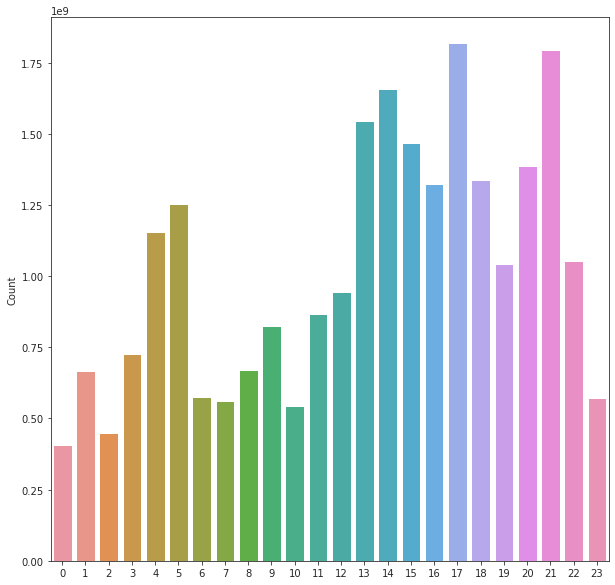

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style("ticks")
ax = sns.barplot(x=toptime['views'].index,y=toptime['views'], data=toptime)
plt.xlabel("")
plt.ylabel("Count")

In [ ]:
time=pd.DataFrame(df.shape[0].index,df['publish_date'],df["trending_date"])
time

,publish_date
trending_date,
2017-11-14,NaN
2017-11-14,NaN
2017-11-14,NaN
2017-11-14,NaN
2017-11-14,NaN
...,...
2018-06-14,NaN
2018-06-14,NaN
2018-06-14,NaN


Text(0.5, 1.0, 'Top 5 Videos that dislikes maximum in Germany')

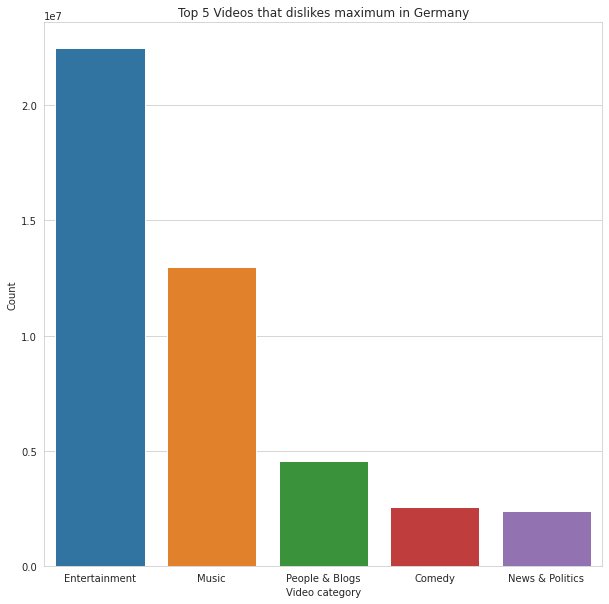

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=toptrend['dislikes'].sort_values(ascending=False).iloc[:5,].index,y=toptrend['dislikes'].sort_values(ascending=False).iloc[:5,], data=toptrend)
plt.xlabel("Video category")
plt.ylabel("Count")
plt.title("Top 5 Videos that dislikes maximum in Germany")

Text(0.5, 1.0, 'Top 5 Videos that likes maximum in Germany')

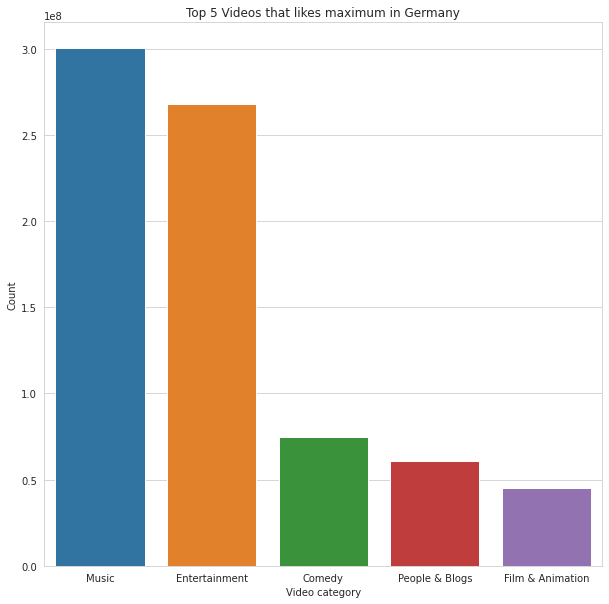

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=toptrend['likes'].sort_values(ascending=False).iloc[:5,].index,y=toptrend['likes'].sort_values(ascending=False).iloc[:5,], data=toptrend)
plt.xlabel("Video category")
plt.ylabel("Count")
plt.title("Top 5 Videos that likes maximum in Germany")

Text(0.5, 1.0, 'Top 5 Videos that views maximum in Germany')

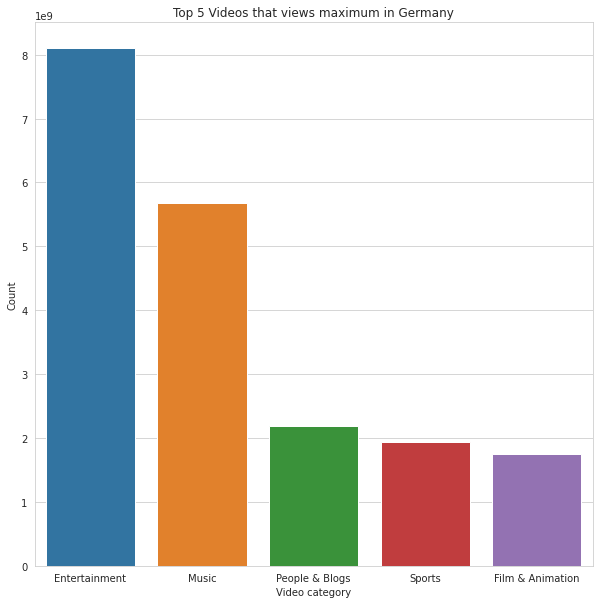

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=toptrend['views'].sort_values(ascending=False).iloc[:5,].index,y=toptrend['views'].sort_values(ascending=False).iloc[:5,], data=toptrend)
plt.xlabel("Video category")
plt.ylabel("Count")
plt.title("Top 5 Videos that views maximum in Germany")

Text(0.5, 1.0, 'Top 5 Videos that comment maximum in Germany')

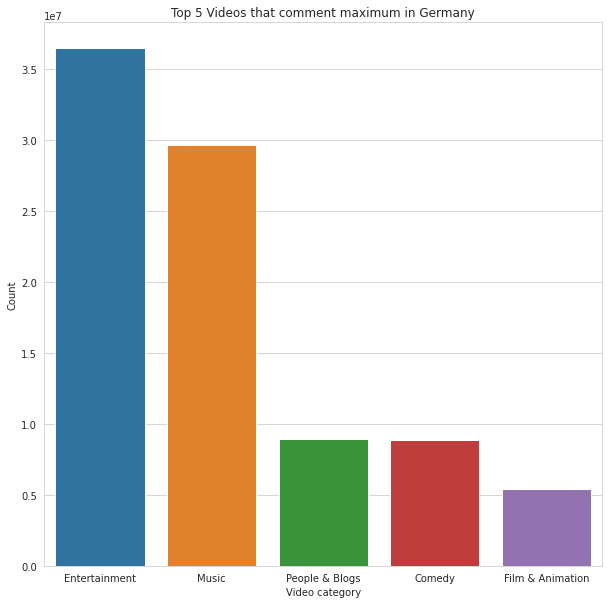

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=toptrend['comment_count'].sort_values(ascending=False).iloc[:5,].index,y=toptrend['comment_count'].sort_values(ascending=False).iloc[:5,], data=toptrend)
plt.xlabel("Video category")
plt.ylabel("Count")
plt.title("Top 5 Videos that comment maximum in Germany")

Text(0.5, 1.0, 'Top 5 Videos that comment maximum in Germany')

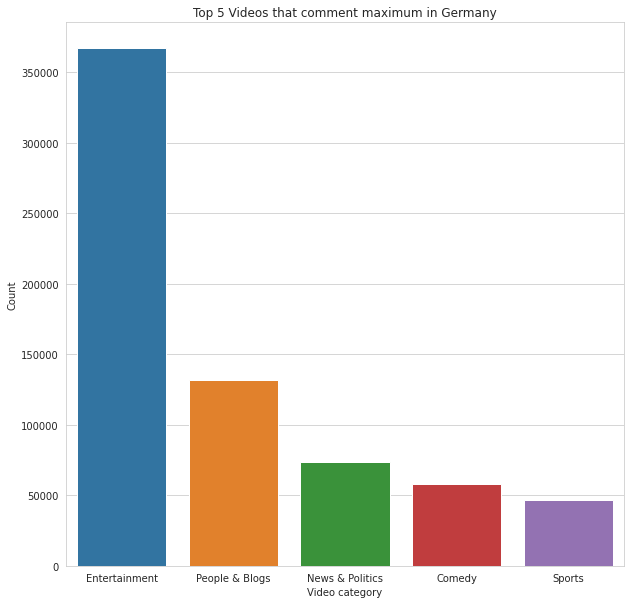

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=toptrend['category_id'].sort_values(ascending=False).iloc[:5,].index,y=toptrend['category_id'].sort_values(ascending=False).iloc[:5,], data=toptrend)
plt.xlabel("Video category")
plt.ylabel("Count")
plt.title("Top 5 Videos that comment maximum in Germany")